<a href="https://colab.research.google.com/github/claireskim02/PER_and_indexes/blob/main/Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

S&P500 Cape Ratio 와 Forward PER, 최근 지수

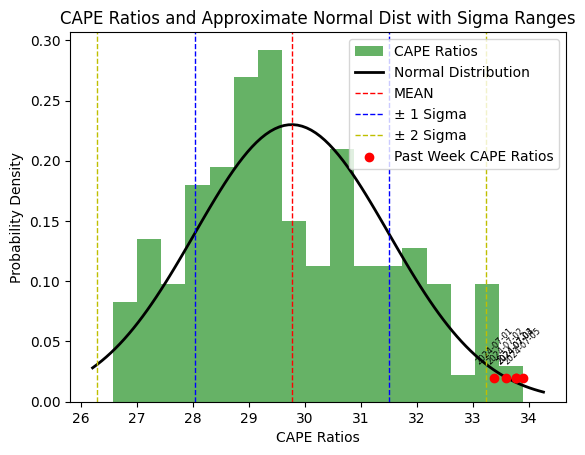

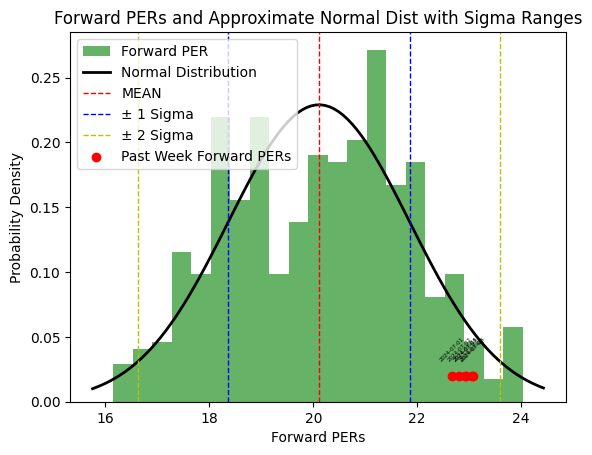

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
%matplotlib inline


In [ ]:
cape = pd.read_csv("smpcape.csv")
cape

,Date,SPX Index - 현재가,SMAVG (50),CAPE
0,2024-07-08,NaN,NaN,NaN
1,2024-07-05,5567.19,5310.46,33.89
2,2024-07-04,NaN,NaN,33.76
3,2024-07-03,5537.02,5300.52,33.76
4,2024-07-02,5509.01,5290.00,33.58
...,...,...,...,...
306,2023-05-05,4136.25,NaN,27.05
307,2023-05-04,4061.22,NaN,26.57
308,2023-05-03,4090.75,NaN,26.74
309,2023-05-02,4119.58,NaN,26.93


In [ ]:
cape["Date"] = pd.to_datetime(cape["Date"])
cape.set_index("Date", inplace = True)
cape

,SPX Index - 현재가,SMAVG (50),CAPE
Date,,,
2024-07-08,NaN,NaN,NaN
2024-07-05,5567.19,5310.46,33.89
2024-07-04,NaN,NaN,33.76
2024-07-03,5537.02,5300.52,33.76
2024-07-02,5509.01,5290.00,33.58
...,...,...,...
2023-05-05,4136.25,NaN,27.05
2023-05-04,4061.22,NaN,26.57
2023-05-03,4090.75,NaN,26.74


In [ ]:
forward = pd.read_csv("spx1.csv")
forward

,Date,SPX Index - 현재가,SMAVG (50),SMAVG (100),SMAVG (200),BEst PER (L1)
0,2024-07-09,NaN,NaN,NaN,NaN,23.0790
1,2024-07-08,5572.85,5320.48,5220.46,4892.79,23.0790
2,2024-07-05,5567.19,5310.46,5214.95,4887.15,23.0490
3,2024-07-04,NaN,NaN,NaN,NaN,22.9283
4,2024-07-03,5537.02,5300.52,5209.54,4881.58,22.9301
...,...,...,...,...,...,...
457,2022-10-07,3639.66,NaN,NaN,NaN,16.3927
458,2022-10-06,3744.52,NaN,NaN,NaN,16.8560
459,2022-10-05,3783.28,NaN,NaN,NaN,17.0339
460,2022-10-04,3790.93,NaN,NaN,NaN,17.0643


In [ ]:
forward["Date"] = pd.to_datetime(forward["Date"])
forward.set_index("Date", inplace= True)
forward

,SPX Index - 현재가,SMAVG (50),SMAVG (100),SMAVG (200),BEst PER (L1)
Date,,,,,
2024-07-09,NaN,NaN,NaN,NaN,23.0790
2024-07-08,5572.85,5320.48,5220.46,4892.79,23.0790
2024-07-05,5567.19,5310.46,5214.95,4887.15,23.0490
2024-07-04,NaN,NaN,NaN,NaN,22.9283
2024-07-03,5537.02,5300.52,5209.54,4881.58,22.9301
...,...,...,...,...,...
2022-10-07,3639.66,NaN,NaN,NaN,16.3927
2022-10-06,3744.52,NaN,NaN,NaN,16.8560
2022-10-05,3783.28,NaN,NaN,NaN,17.0339


In [ ]:
forward = forward[1:]
forward

,SPX Index - 현재가,SMAVG (50),SMAVG (100),SMAVG (200),BEst PER (L1)
Date,,,,,
2024-07-08,5572.85,5320.48,5220.46,4892.79,23.0790
2024-07-05,5567.19,5310.46,5214.95,4887.15,23.0490
2024-07-04,NaN,NaN,NaN,NaN,22.9283
2024-07-03,5537.02,5300.52,5209.54,4881.58,22.9301
2024-07-02,5509.01,5290.00,5204.15,4876.15,22.8116
...,...,...,...,...,...
2022-10-07,3639.66,NaN,NaN,NaN,16.3927
2022-10-06,3744.52,NaN,NaN,NaN,16.8560
2022-10-05,3783.28,NaN,NaN,NaN,17.0339


In [ ]:
forward = forward[1:]
forward

,SPX Index - 현재가,SMAVG (50),SMAVG (100),SMAVG (200),BEst PER (L1)
Date,,,,,
2024-07-05,5567.19,5310.46,5214.95,4887.15,23.0490
2024-07-04,NaN,NaN,NaN,NaN,22.9283
2024-07-03,5537.02,5300.52,5209.54,4881.58,22.9301
2024-07-02,5509.01,5290.00,5204.15,4876.15,22.8116
2024-07-01,5475.09,5279.16,5199.01,4871.13,22.6673
...,...,...,...,...,...
2022-10-07,3639.66,NaN,NaN,NaN,16.3927
2022-10-06,3744.52,NaN,NaN,NaN,16.8560
2022-10-05,3783.28,NaN,NaN,NaN,17.0339


In [ ]:
cape = cape[1:]
cape

,SPX Index - 현재가,SMAVG (50),CAPE
Date,,,
2024-07-05,5567.19,5310.46,33.89
2024-07-04,NaN,NaN,33.76
2024-07-03,5537.02,5300.52,33.76
2024-07-02,5509.01,5290.00,33.58
2024-07-01,5475.09,5279.16,33.38
...,...,...,...
2023-05-05,4136.25,NaN,27.05
2023-05-04,4061.22,NaN,26.57
2023-05-03,4090.75,NaN,26.74


In [ ]:
cape.iloc[:,0]

Date
2024-07-05    5567.19
2024-07-04        NaN
2024-07-03    5537.02
2024-07-02    5509.01
2024-07-01    5475.09
               ...   
2023-05-05    4136.25
2023-05-04    4061.22
2023-05-03    4090.75
2023-05-02    4119.58
2023-05-01    4167.87
Name: SPX Index - 현재가, Length: 310, dtype: float64

In [ ]:
df = pd.DataFrame({"Current_Price": forward.iloc[:,0],"CAPE":cape["CAPE"], "Forward_PER": forward.iloc[:,4]})
df

,Current_Price,CAPE,Forward_PER
Date,,,
2022-10-03,3678.43,NaN,16.5585
2022-10-04,3790.93,NaN,17.0643
2022-10-05,3783.28,NaN,17.0339
2022-10-06,3744.52,NaN,16.8560
2022-10-07,3639.66,NaN,16.3927
...,...,...,...
2024-07-01,5475.09,33.38,22.6673
2024-07-02,5509.01,33.58,22.8116
2024-07-03,5537.02,33.76,22.9301


In [ ]:
df = df.dropna()
df

,Current_Price,CAPE,Forward_PER
Date,,,
2023-05-01,4167.87,27.25,19.0917
2023-05-02,4119.58,26.93,18.8805
2023-05-03,4090.75,26.74,18.7398
2023-05-04,4061.22,26.57,18.6107
2023-05-05,4136.25,27.05,18.9480
...,...,...,...
2024-06-28,5460.48,33.28,22.5999
2024-07-01,5475.09,33.38,22.6673
2024-07-02,5509.01,33.58,22.8116


In [ ]:
Price_diff = []
for i in range(len(df)-1):
  a = df["Current_Price"][i+1]- df["Current_Price"][i]
  Price_diff.append(a)
Price_diff

[-48.289999999999964,
 -28.829999999999927,
 -29.5300000000002,
 75.0300000000002,
 1.8699999999998909,
 -18.949999999999818,
 18.470000000000255,
 -7.020000000000437,
 -6.539999999999964,
 12.199999999999818,
 -26.38000000000011,
 48.8700000000008,
 39.279999999999745,
 -6.0700000000006185,
 0.6500000000005457,
 -47.05000000000018,
 -30.340000000000146,
 36.039999999999964,
 54.17000000000007,
 0.07000000000061846,
 -25.69000000000051,
 41.19000000000051,
 61.349999999999454,
 -8.579999999999927,
 10.0600000000004,
 -16.329999999999927,
 26.409999999999854,
 4.9299999999993815,
 40.07000000000062,
 30.079999999999927,
 3.5799999999999272,
 53.25,
 -16.25,
 -20.88000000000011,
 -23.020000000000437,
 16.200000000000728,
 -33.5600000000004,
 -19.51000000000022,
 49.590000000000146,
 -1.550000000000182,
 19.579999999999927,
 53.94000000000051,
 5.210000000000036,
 -8.770000000000437,
 -35.22999999999956,
 -12.640000000000327,
 10.579999999999927,
 29.730000000000473,
 32.899999999999636,


In [ ]:
df = df.iloc[1:]
df

,Current_Price,CAPE,Forward_PER
Date,,,
2023-05-02,4119.58,26.93,18.8805
2023-05-03,4090.75,26.74,18.7398
2023-05-04,4061.22,26.57,18.6107
2023-05-05,4136.25,27.05,18.9480
2023-05-08,4138.12,27.07,18.9807
...,...,...,...
2024-06-28,5460.48,33.28,22.5999
2024-07-01,5475.09,33.38,22.6673
2024-07-02,5509.01,33.58,22.8116


In [ ]:
df["Price_Delta"] = Price_diff
df

<ipython-input-34-96f744495e3e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Price_Delta"] = Price_diff


,Current_Price,CAPE,Forward_PER,Price_Delta
Date,,,,
2023-05-02,4119.58,26.93,18.8805,-48.29
2023-05-03,4090.75,26.74,18.7398,-28.83
2023-05-04,4061.22,26.57,18.6107,-29.53
2023-05-05,4136.25,27.05,18.9480,75.03
2023-05-08,4138.12,27.07,18.9807,1.87
...,...,...,...,...
2024-06-28,5460.48,33.28,22.5999,-22.39
2024-07-01,5475.09,33.38,22.6673,14.61
2024-07-02,5509.01,33.58,22.8116,33.92


In [ ]:
df["PER_avg"]= 0.5*df["CAPE"]+0.5*df["Forward_PER"]
df

<ipython-input-36-b7a6ce3a9699>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["PER_avg"]= 0.5*df["CAPE"]+0.5*df["Forward_PER"]


,Current_Price,CAPE,Forward_PER,Price_Delta,PER_avg
Date,,,,,
2023-05-02,4119.58,26.93,18.8805,-48.29,22.90525
2023-05-03,4090.75,26.74,18.7398,-28.83,22.73990
2023-05-04,4061.22,26.57,18.6107,-29.53,22.59035
2023-05-05,4136.25,27.05,18.9480,75.03,22.99900
2023-05-08,4138.12,27.07,18.9807,1.87,23.02535
...,...,...,...,...,...
2024-06-28,5460.48,33.28,22.5999,-22.39,27.93995
2024-07-01,5475.09,33.38,22.6673,14.61,28.02365
2024-07-02,5509.01,33.58,22.8116,33.92,28.19580


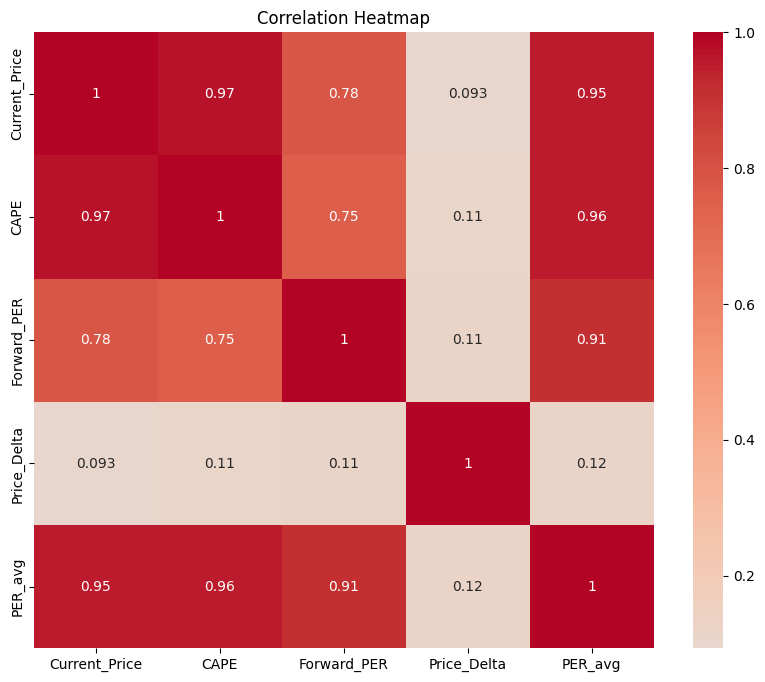

In [ ]:
corr_matrix = df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap= 'coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

위에 보이는 것처럼 전날과 가격차는 CAPE, Forward PER,또는 둘의 평균 중 어느 변수와 상관관계가 있어보이지 않습니다.
하지만 가격차를 날마다 따지는 데에 문제를 둘 수 있음으로 가격차를 주간, 또는 월간으로 쳤을때 어떻게 나올지 살펴볼 수 있습니다.
또한 금리에 대한 기대치 역시 고려하여 상관관계들을 살펴보면 좋을 것 같습니다.

In [ ]:
data = pd.read_csv("delta.csv")
data

,Date,SPX Index (L1),FDTRMID Index (R1),BEst PER,장기 주가수익비율
0,2024-07-09,5572.85,5.375,23.0790,33.9720
1,2024-07-05,5567.19,5.375,23.0490,33.9441
2,2024-06-28,5460.48,5.375,22.5999,33.2826
3,2024-06-21,5464.62,5.375,22.6289,33.2522
4,2024-06-14,5431.60,5.375,22.4872,33.0538
...,...,...,...,...,...
567,2013-08-30,1632.97,0.125,14.7533,17.8473
568,2013-08-23,1663.50,0.125,15.0175,18.1854
569,2013-08-16,1655.83,0.125,14.9411,18.1120
570,2013-08-09,1691.42,0.125,15.2448,18.4828


In [ ]:
data["Date"] = pd.to_datetime(data["Date"])
data.set_index("Date", inplace=True)
data

,SPX Index (L1),FDTRMID Index (R1),BEst PER,장기 주가수익비율
Date,,,,
2024-07-09,5572.85,5.375,23.0790,33.9720
2024-07-05,5567.19,5.375,23.0490,33.9441
2024-06-28,5460.48,5.375,22.5999,33.2826
2024-06-21,5464.62,5.375,22.6289,33.2522
2024-06-14,5431.60,5.375,22.4872,33.0538
...,...,...,...,...
2013-08-30,1632.97,0.125,14.7533,17.8473
2013-08-23,1663.50,0.125,15.0175,18.1854
2013-08-16,1655.83,0.125,14.9411,18.1120


In [ ]:
new_col = ["SPX_price", "Fed_target_mid", "Forward_PER", "CAPE"]
data.columns = new_col
data

,SPX_price,Fed_target_mid,Forward_PER,CAPE
Date,,,,
2024-07-09,5572.85,5.375,23.0790,33.9720
2024-07-05,5567.19,5.375,23.0490,33.9441
2024-06-28,5460.48,5.375,22.5999,33.2826
2024-06-21,5464.62,5.375,22.6289,33.2522
2024-06-14,5431.60,5.375,22.4872,33.0538
...,...,...,...,...
2013-08-30,1632.97,0.125,14.7533,17.8473
2013-08-23,1663.50,0.125,15.0175,18.1854
2013-08-16,1655.83,0.125,14.9411,18.1120


In [ ]:
data= data.sort_index()
data

,SPX_price,Fed_target_mid,Forward_PER,CAPE
Date,,,,
2013-08-02,1709.67,0.125,15.4237,18.6845
2013-08-09,1691.42,0.125,15.2448,18.4828
2013-08-16,1655.83,0.125,14.9411,18.1120
2013-08-23,1663.50,0.125,15.0175,18.1854
2013-08-30,1632.97,0.125,14.7533,17.8473
...,...,...,...,...
2024-06-14,5431.60,5.375,22.4872,33.0538
2024-06-21,5464.62,5.375,22.6289,33.2522
2024-06-28,5460.48,5.375,22.5999,33.2826


In [ ]:
data = data.dropna()
data

,SPX_price,Fed_target_mid,Forward_PER,CAPE
Date,,,,
2013-08-02,1709.67,0.125,15.4237,18.6845
2013-08-09,1691.42,0.125,15.2448,18.4828
2013-08-16,1655.83,0.125,14.9411,18.1120
2013-08-23,1663.50,0.125,15.0175,18.1854
2013-08-30,1632.97,0.125,14.7533,17.8473
...,...,...,...,...
2024-06-14,5431.60,5.375,22.4872,33.0538
2024-06-21,5464.62,5.375,22.6289,33.2522
2024-06-28,5460.48,5.375,22.5999,33.2826


In [ ]:
diff = []
for i in range(len(data)-1):
  a = 100*(data["SPX_price"][i+1]-data["SPX_price"][i])/(data["SPX_price"][i])
  diff.append(a)



In [ ]:
len(diff)

571

In [ ]:
data = data.drop(data.index[-1])
data["Price_Delta"] = diff
data

,SPX_price,Fed_target_mid,Forward_PER,CAPE,Price_Delta
Date,,,,,
2013-08-02,1709.67,0.125,15.4237,18.6845,-1.067457
2013-08-09,1691.42,0.125,15.2448,18.4828,-2.104149
2013-08-16,1655.83,0.125,14.9411,18.1120,0.463212
2013-08-23,1663.50,0.125,15.0175,18.1854,-1.835287
2013-08-30,1632.97,0.125,14.7533,17.8473,1.359486
...,...,...,...,...,...
2024-06-07,5346.99,5.375,22.1083,32.5373,1.582386
2024-06-14,5431.60,5.375,22.4872,33.0538,0.607924
2024-06-21,5464.62,5.375,22.6289,33.2522,-0.075760


In [ ]:
data.corr()

,SPX_price,Fed_target_mid,Forward_PER,CAPE,Price_Delta
SPX_price,1.000000,0.607759,0.593536,0.891965,-0.015537
Fed_target_mid,0.607759,1.000000,0.042087,0.307591,0.017764
Forward_PER,0.593536,0.042087,1.000000,0.682372,-0.001393
CAPE,0.891965,0.307591,0.682372,1.000000,-0.048666
Price_Delta,-0.015537,0.017764,-0.001393,-0.048666,1.000000


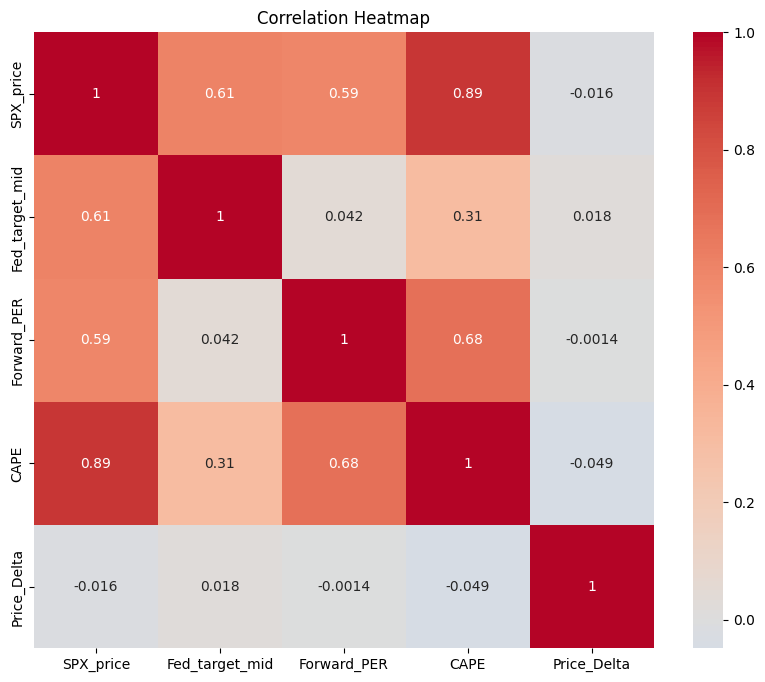

In [ ]:
corre = data.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corre, annot=True, cmap = 'coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

진전은 없지만 상관관계가 없는 것은 지표들이 혼자만으로는 상관관계가 없는 이유일 수도 있기에 regression을 진행해보도록 하겠습니다.

Text(0, 0.5, 'weekly price change(%)')

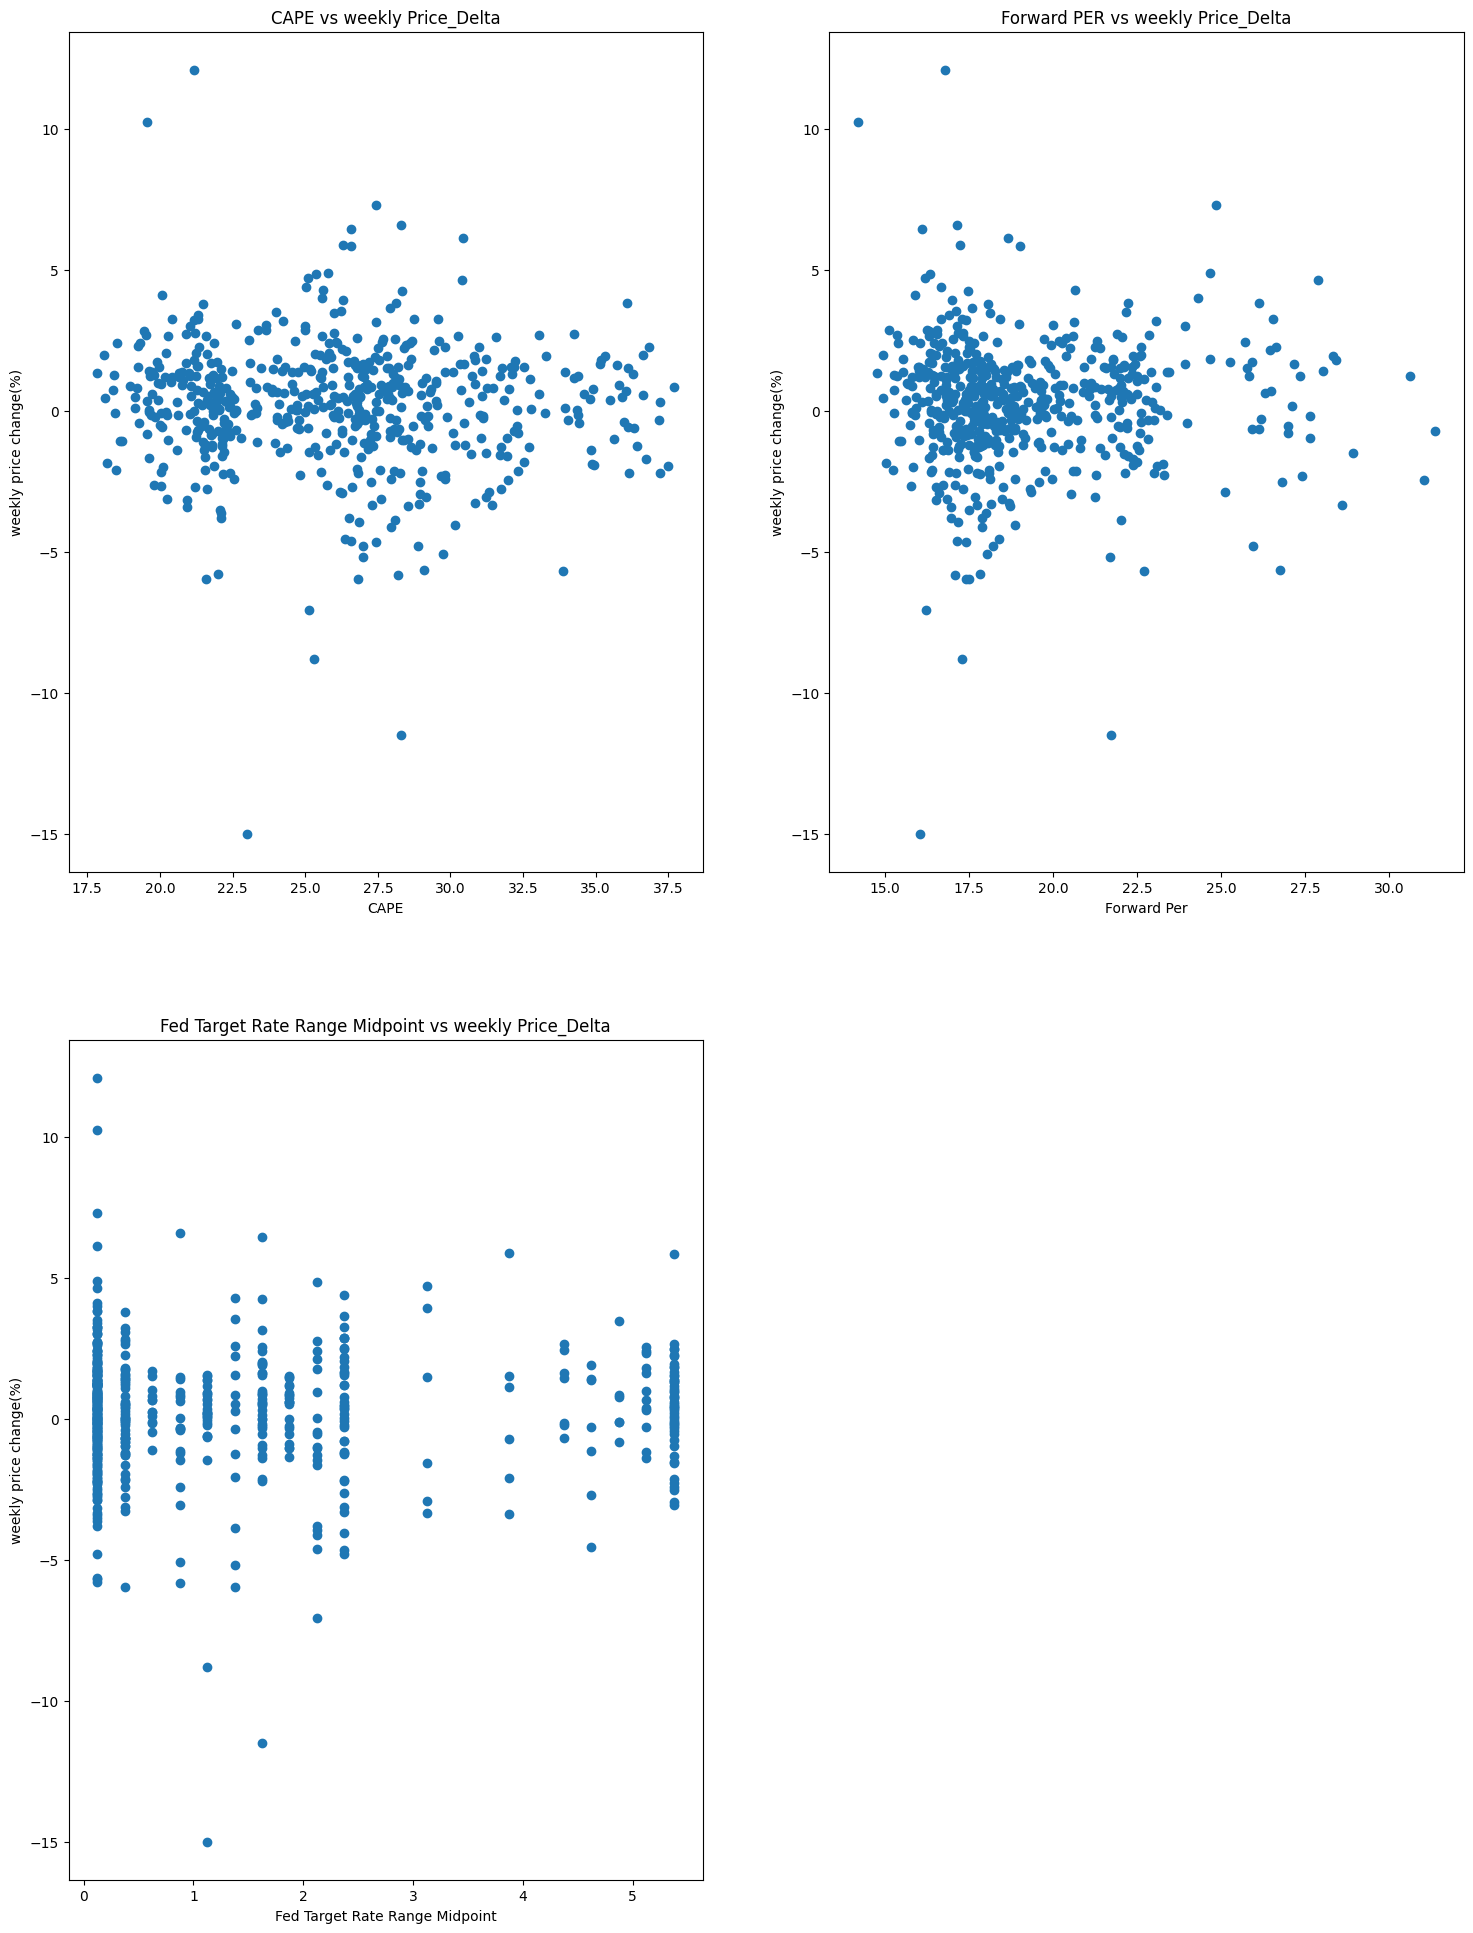

In [ ]:
#plotting visualizations of forward per, cape, and fed rates target against each other
plt.figure(figsize = (18,24))

plt.subplot(2,2,1)
plt.scatter(data["CAPE"], data["Price_Delta"])
plt.title("CAPE vs weekly Price_Delta")
plt.xlabel("CAPE")
plt.ylabel("weekly price change(%)")

plt.subplot(2,2,2)
plt.scatter(data["Forward_PER"], data["Price_Delta"])
plt.title("Forward PER vs weekly Price_Delta")
plt.xlabel("Forward Per")
plt.ylabel("weekly price change(%)")


plt.subplot(2,2,3)
plt.scatter(data["Fed_target_mid"], data["Price_Delta"])
plt.title("Fed Target Rate Range Midpoint vs weekly Price_Delta")
plt.xlabel("Fed Target Rate Range Midpoint")
plt.ylabel("weekly price change(%)")


In [ ]:
#also assessing collinearity between cape and forward per before regression:
from statsmodels.stats.outliers_influence import variance_inflation_factor
dfdf = data[["CAPE", "Forward_PER"]]
X=sm.add_constant(dfdf)
vif_data = pd.DataFrame()
vif_data["feature"]=X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\VIF for selected features:\n", vif_data)

\VIF for selected features:
        feature        VIF
0        const  46.964423
1         CAPE   1.871368
2  Forward_PER   1.871368


In [ ]:
#with the above VIF value, we find that it is acceptable to use CAPE and forward looking PER as separate variables in the regression model
#first trying MLR

In [ ]:
pip install pandas scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X= data[['Fed_target_mid', 'Forward_PER', 'CAPE']]
y= data["Price_Delta"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

print('Coefficients:', model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 4.108341275810996
R^2 Score: -0.030180230745226577
Coefficients: [ 0.08070461  0.07929016 -0.06737082]
Intercept: 0.30302060431485855


In [ ]:
#model2
X1= data[['Forward_PER', 'CAPE']]
y1= data["Price_Delta"]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1,test_size = 0.2, random_state=42)

model1 = LinearRegression()
model1.fit(X_train1, y_train1)

y_pred1 = model1.predict(X_test1)

mse1 = mean_squared_error(y_test1, y_pred1)
r21 = r2_score(y_test1, y_pred1)

print(f'Mean Squared Error: {mse1}')
print(f'R^2 Score: {r21}')

print('Coefficients:', model1.coef_)
print("Intercept:", model1.intercept_)

Mean Squared Error: 4.096459771572819
R^2 Score: -0.027200904064224707
Coefficients: [ 0.06513322 -0.0531117 ]
Intercept: 0.3147218100465411


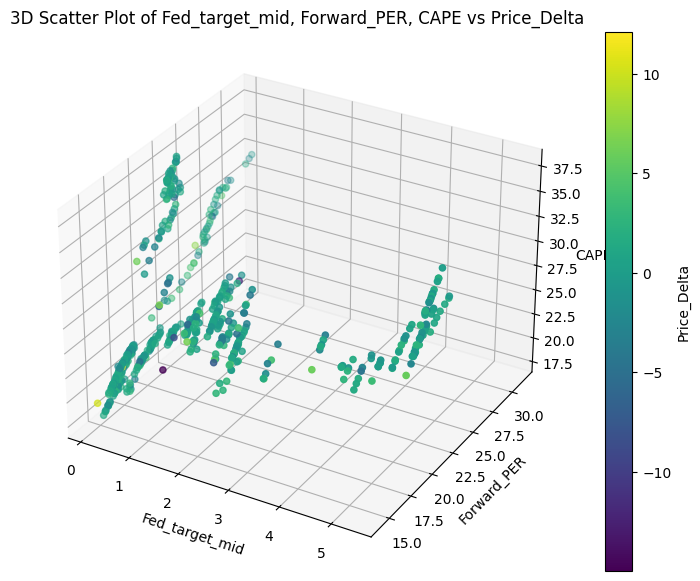

In [ ]:
#seems linear regressions won't work... maybe using a clustering algorithm to predict
#first, we will visualize the three variables as a predictor of the price delta
from mpl_toolkits.mplot3d import Axes3D

X2= data["Fed_target_mid"]
X3 = data["Forward_PER"]
X4 = data["CAPE"]
y2 = data["Price_Delta"]

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection ='3d')

scatter = ax.scatter(X2, X3, X4, c=y2, cmap = 'viridis')

colorbar = plt.colorbar(scatter, ax= ax)
colorbar.set_label("Price_Delta")

ax.set_xlabel("Fed_target_mid")
ax.set_ylabel("Forward_PER")
ax.set_zlabel("CAPE")
plt.title("3D Scatter Plot of Fed_target_mid, Forward_PER, CAPE vs Price_Delta")

plt.show()

The optimal value of k is 19 with a cross-validation accuracy of 0.5616


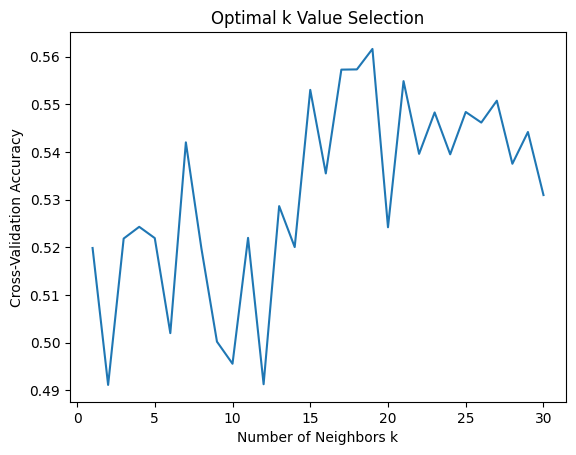

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score

data["Price_Delta_Class"] = np.where(data["Price_Delta"]>0,1,0)

kX = data[["Fed_target_mid", "Forward_PER","CAPE"]]
ky = data["Price_Delta_Class"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(kX)

kX_train, kX_test, ky_train, ky_test = train_test_split(X_scaled, ky, test_size=0.2, random_state=42)

k_values = range(1,31)
cv_scores = []

for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, kX_train, ky_train, cv=10, scoring ='accuracy')
  cv_scores.append(scores.mean())

opt_k = k_values[cv_scores.index(max(cv_scores))]
print(f'The optimal value of k is {opt_k} with a cross-validation accuracy of {max(cv_scores):.4f}')

plt.plot(k_values, cv_scores)
plt.xlabel('Number of Neighbors k')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Optimal k Value Selection')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 19)
knn.fit(kX_train, ky_train)

ky_pred = knn.predict(kX_test)

accuracy = accuracy_score(ky_test, ky_pred)
conf_matrix = confusion_matrix(ky_test, ky_pred)
class_report = classification_report(ky_test, ky_pred)

print(f'Accuracy:{accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy:0.6086956521739131
Confusion Matrix:
[[ 3 37]
 [ 8 67]]
Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.07      0.12        40
           1       0.64      0.89      0.75        75

    accuracy                           0.61       115
   macro avg       0.46      0.48      0.43       115
weighted avg       0.52      0.61      0.53       115



In [ ]:
#testing

new_test_case = [[1.375, 25.6769, 43.33]] #Fed_target_mid, Forward PER, CAPE
new_test_case_scaled = scaler.transform(new_test_case)
new_prediction = knn.predict(new_test_case_scaled)

prediction_label = 'Positive' if new_prediction[0]==1 else 'Negative'
print(f'The model predicts the Price_elta to be: {prediction_label}')

The model predicts the Price_elta to be: Negative


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


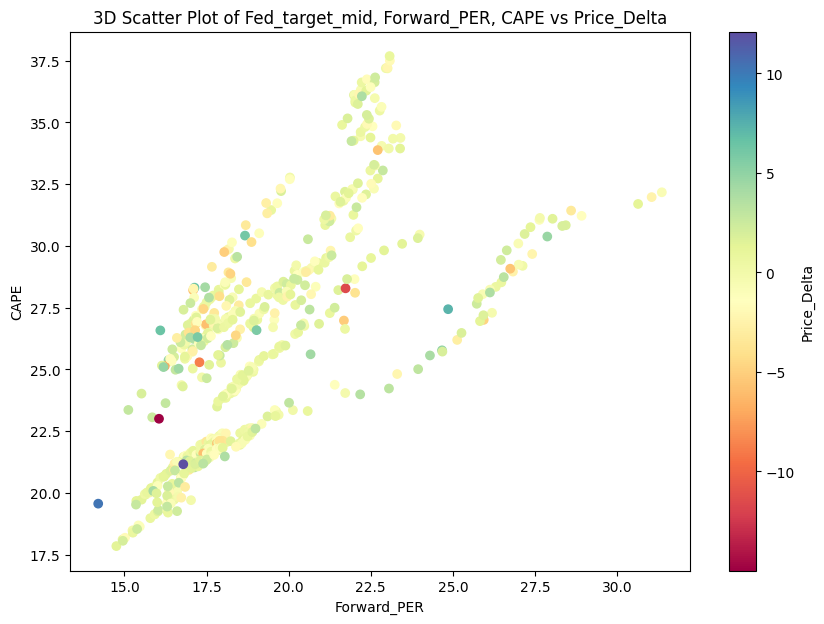

In [ ]:
#try model without fed
#first, we will visualize the three variables as a predictor of the price delta

X3 = data["Forward_PER"]
X4 = data["CAPE"]
y2 = data["Price_Delta"]

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)

scatter = ax.scatter(X3, X4, c=y2, cmap = 'Spectral')

colorbar = plt.colorbar(scatter, ax= ax)
colorbar.set_label("Price_Delta")

ax.set_xlabel("Forward_PER")
ax.set_ylabel("CAPE")
plt.title("3D Scatter Plot of Fed_target_mid, Forward_PER, CAPE vs Price_Delta")

plt.show()

The optimal value of k is 7 with a cross-validation accuracy of 0.5616


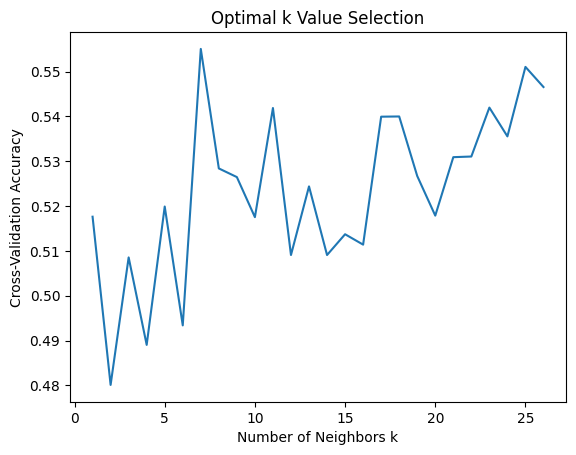

In [ ]:

kX1 = data[["Forward_PER","CAPE"]]
ky1 = data["Price_Delta_Class"]

scaler = StandardScaler()
X_scaled1 = scaler.fit_transform(kX1)

kX1_train, kX1_test, ky1_train, ky1_test = train_test_split(X_scaled1, ky1, test_size=0.2, random_state=42)

k_values1 = range(1,27)
cv_scores1 = []

for k in k_values1:
  knn1 = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn1, kX1_train, ky1_train, cv=10, scoring ='accuracy')
  cv_scores1.append(scores.mean())

opt_k1 = k_values1[cv_scores1.index(max(cv_scores1))]
print(f'The optimal value of k is {opt_k1} with a cross-validation accuracy of {max(cv_scores):.4f}')

plt.plot(k_values1, cv_scores1)
plt.xlabel('Number of Neighbors k')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Optimal k Value Selection')
plt.show()

In [ ]:
knn1 = KNeighborsClassifier(n_neighbors = 7)
knn1.fit(kX1_train, ky1_train)

ky1_pred = knn1.predict(kX1_test)

accuracy1 = accuracy_score(ky1_test, ky1_pred)
conf_matrix1 = confusion_matrix(ky1_test, ky1_pred)
class_report1 = classification_report(ky1_test, ky1_pred)

print(f'Accuracy:{accuracy1}')
print('Confusion Matrix:')
print(conf_matrix1)
print('Classification Report:')
print(class_report1)

Accuracy:0.5217391304347826
Confusion Matrix:
[[10 30]
 [25 50]]
Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.25      0.27        40
           1       0.62      0.67      0.65        75

    accuracy                           0.52       115
   macro avg       0.46      0.46      0.46       115
weighted avg       0.51      0.52      0.51       115



In [ ]:
#testing

new_test_case = [[15.4237,18.6845]] #Forward PER, CAPE
new_test_case_scaled = scaler.transform(new_test_case)
new_prediction = knn1.predict(new_test_case_scaled)

prediction_label = 'Positive' if new_prediction[0]==1 else 'Negative'
print(f'The model predicts the Price_elta to be: {prediction_label}')

The model predicts the Price_elta to be: Negative


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
